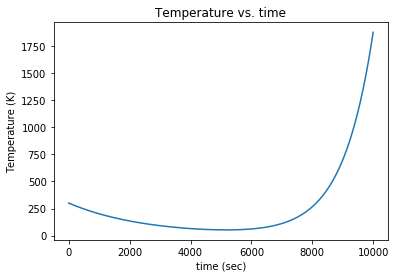

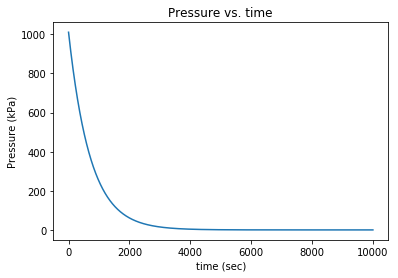

In [41]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 1 10:56:21 2018

solve_ODEs_CHE8040_HW2.py 
%  ouput is pressure and temperature in Pa and K, respectively 

@author: nguyenedalgo

"""

import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def ODEs_HW2(N_and_T,tRange):
    """
    %% Description of Input and output parameters or varibales:
        % V_bar : extensive property of volume occupied by the gas in the chamber
        % R     : gas constant 
        % p 	: pressure
        % T 	: temperature
        % N 	: number of moles
        % t 	: time 

    %% Units of Input and output parameters or varibales:
        % V_bar : m3
        % R     : J/mol-K or m3-Pa/mol-K
        % p 	: Pa
        % T 	: K
        % N 	: mol
        % t 	: sec 

    """

    # define the system of ODEs  
    # Unpack mass and temperature into descriptive variable
    N = N_and_T[0];
    T = N_and_T[1];
    
    # All parameters
    N_dot_leak = 10E-7 
    q_dot_pump = 10E-3
    #M_air = 1225 
    #Mw_air = 28.97
    Cp = 29; 
    R  = 8.314;
    q_dot_leak = 10 
    T_in = 27+273.15 
    V_bar = 10 
    
    # All algebraic eq
    Cv = Cp-R;
    p = N*R*T/V_bar
    N_dot_out = q_dot_pump/R*(p/T)
    
    ## define ODEs 
    dN_dt = N_dot_leak-N_dot_out
    dT_dt = R/(N*Cv)*(N_dot_leak*T_in-N_dot_out*T)+q_dot_leak/(N*Cv)

    return dN_dt, dT_dt

## Setup initital conditions for the ODE solver
V_bar = 10
R = 8.314
po = 1.01*10E5;
To = 27+273.15
No = po*V_bar/R/To 
IC = No, To

## Define the step size
to = 0; tf = 10000;
tRange = np.arange(to, tf+1, 1)

# Call odeint to solve ODEs
soln=odeint(ODEs_HW2, IC, tRange, args = ())

#Output vectors of numerators for each value of the denominator in the t
N = soln[:,0]
T = soln[:,1] 
p = N*R*T/V_bar*1E-3;


## Figure 1: Plot the results of T vs. t 
plt.figure(1)
plt.plot(tRange,T)

plt.title('Temperature vs. time')
plt.xlabel('time (sec)')
plt.ylabel('Temperature (K)')
plt.show()


## Figure 2: Plot the results of p vs.  t
plt.figure(2)
plt.plot(tRange,p)

plt.title('Pressure vs. time')
plt.xlabel('time (sec)')
plt.ylabel('Pressure (kPa)')
plt.show()


In [28]:
print p[1000]

248.80288587922666
